<a href="https://colab.research.google.com/github/pavlejviki/users_movie_ratings_analisys/blob/main/geniusee_test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import statements**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

**Notebook presentation**

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

**Load the data**

In [29]:
ratings_df = pd.read_csv('drive/MyDrive/ratings.csv')
movies_df = pd.read_csv('drive/MyDrive/movies.csv')
df = pd.merge(ratings_df, movies_df, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.00,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.00,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.00,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.00,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.00,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


**Data cleaning - check for missing rows and duplicates**

In [5]:
df.info()
print(f'Any NaN values? {df.isna().values.any()}')
print(f'Any duplicates? {df.duplicated().values.any()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB
Any NaN values? False
Any duplicates? False


**The total number of ratings provided by each user**

In [17]:
user_ratings = df.groupby('userId')['rating']
user_total_ratings = user_ratings.count()
user_total_ratings

userId
1          70
2         184
3         656
4         242
5         101
         ... 
162537    101
162538    154
162539     47
162540     88
162541    182
Name: rating, Length: 162541, dtype: int64

In [16]:
user_total_ratings.describe()

count   162,541.00
mean        153.81
std         268.05
min          20.00
25%          36.00
50%          71.00
75%         162.00
max      32,202.00
Name: rating, dtype: float64

The majority of users in the dataset have given fewer than 162 ratings,and there are a few users who have given a large number of ratings. The mean number of ratings per user is 153.81 and the standard deviation is 268.05, indicating that the distribution of ratings is quite spread out and there is a lot of variability in the number of ratings per user.

**Visualization of the distribution of the user ratings**

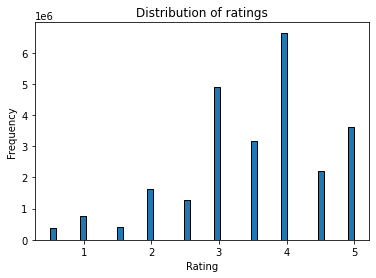

In [10]:
plt.hist(df['rating'], bins=50, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')
plt.show()

This histogram shows the distribution of ratings given by users. The x-axis represents the rating values and the y-axis represents the frequency of each rating value. The histogram gives a visual representation of how frequently each rating value was given by users.The majority of ratings fall between 3 and 4, with the peak at 4, and relatively fewer ratings falling between low ratings 1 and 2.

**The average number of movies a user has ranked.**

In [18]:
avg_movies_ranked = round(user_total_ratings.mean())

The overall level of movie-rating activity among the users in the dataset is approx. 154 movie ratings per user on average.

**The minimum, maximum, and average rating each user has provided.**

In [ ]:
user_ratings_aggregates = user_ratings.agg(['min', 'max', 'mean'])
user_ratings

,min,max,mean
userId,,,
1,0.50,5.00,3.81
2,0.50,5.00,3.63
3,2.00,5.00,3.70
4,0.50,5.00,3.38
5,2.00,5.00,3.75
...,...,...,...
162537,1.00,5.00,4.04
162538,0.50,5.00,3.42
162539,2.00,5.00,4.51


**The top 10 movies by average rating**

In [27]:
top_10_movies = df.groupby('movieId')['rating'].agg(['mean', 'count']).sort_values(by=['mean', 'count'], ascending=[False, False]).head(10)
top_10_movies

,mean,count
movieId,,
118268,5.00,3
148298,5.00,3
165787,5.00,3
179731,5.00,3
133297,5.00,2
137853,5.00,2
139547,5.00,2
140369,5.00,2
140377,5.00,2


These are the 10 movies with the highest number of top rating in the dataframe.

**The list of genre preferences for each user**

In [19]:
grouped = df.groupby(['userId', 'genres'])['rating'].agg(['count', 'mean'])
genre_preferences = grouped.reset_index()
genre_preferences.columns = ['userId', 'genres', 'number of ratings', 'average rating']
genre_preferences.head(50)

,userId,genres,number of ratings,average rating
0,1,Action|Adventure|Comedy|Fantasy,1,3.50
1,1,Action|Adventure|Crime|Drama|Thriller,1,5.00
2,1,Action|Comedy,1,3.00
3,1,Action|Crime,1,5.00
4,1,Adventure|Animation|Children|Comedy,1,4.00
5,1,Adventure|Animation|Children|Comedy|Musical|Ro...,1,4.00
6,1,Adventure|Children|Fantasy,1,3.50
7,1,Adventure|Comedy|Sci-Fi,1,2.50
8,1,Adventure|Comedy|Sci-Fi|Western,1,2.50
9,1,Adventure|Drama,1,3.00


The data shows the count of ratings and the mean ratings of different genres given by each user.
The average number of ratings gives an idea of the genres that a user is interested in and how frequently they rate movies belonging to those genres. 

Based on the mean ratings, we can understand the user's preference for a particular genre. Higher mean ratings for a genre indicate a higher preference for that genre, whereas lower mean ratings indicate a lower preference for that genre.

For example, User with ID 1 has a diverse range of genre preferences,  across several genres including action, adventure, comedy, drama, fantasy, musical, and more. The average rating given by the user is in the range of 2.00 to 5.00. The most rated genre by this user is drama, with a total of 22 ratings and an average rating of 3.73.